# Experiment Notebook
This notebook is created for experimentation and testing in the `_sandbox` folder.

In [45]:
# Import Required Libraries
import numpy as np
import pickle
import os
import pprint as pp

samples_dir = "/home/mg873uh/Projects_kb/data/finetuning_preproc/Task002_FOMO2"

In [20]:
# List few random .npy samples and their dimensions
number_of_samples = 12
npy_files = [f for f in os.listdir(samples_dir) if f.endswith('.npy')]
random_samples = np.random.choice(npy_files, size=number_of_samples, replace=False)

sample_dimensions = {}
for sample in random_samples:
    sample_path = os.path.join(samples_dir, sample)
    data = np.load(sample_path)
    sample_dimensions[sample] = data.shape

print("Random .npy samples and their dimensions:")
pp.pprint(sample_dimensions)

Random .npy samples and their dimensions:
{'sub_10058_ses_1_t1_2.npy': (161, 164, 60),
 'sub_1043_ses_1_t1.npy': (178, 251, 197),
 'sub_10512_ses_5_dwi.npy': (210, 210, 120),
 'sub_1194_ses_1_t1.npy': (157, 245, 185),
 'sub_1355_ses_2_t2.npy': (192, 140, 60),
 'sub_2007_ses_3_dwi.npy': (126, 168, 145),
 'sub_4820_ses_1_t1_2.npy': (137, 170, 136),
 'sub_5582_ses_1_t1.npy': (144, 176, 149),
 'sub_6213_ses_1_t2.npy': (176, 219, 197),
 'sub_7346_ses_1_scan_13.npy': (140, 187, 152),
 'sub_9199_ses_3_t1.npy': (134, 156, 135),
 'sub_9792_ses_1_flair.npy': (154, 239, 195)}


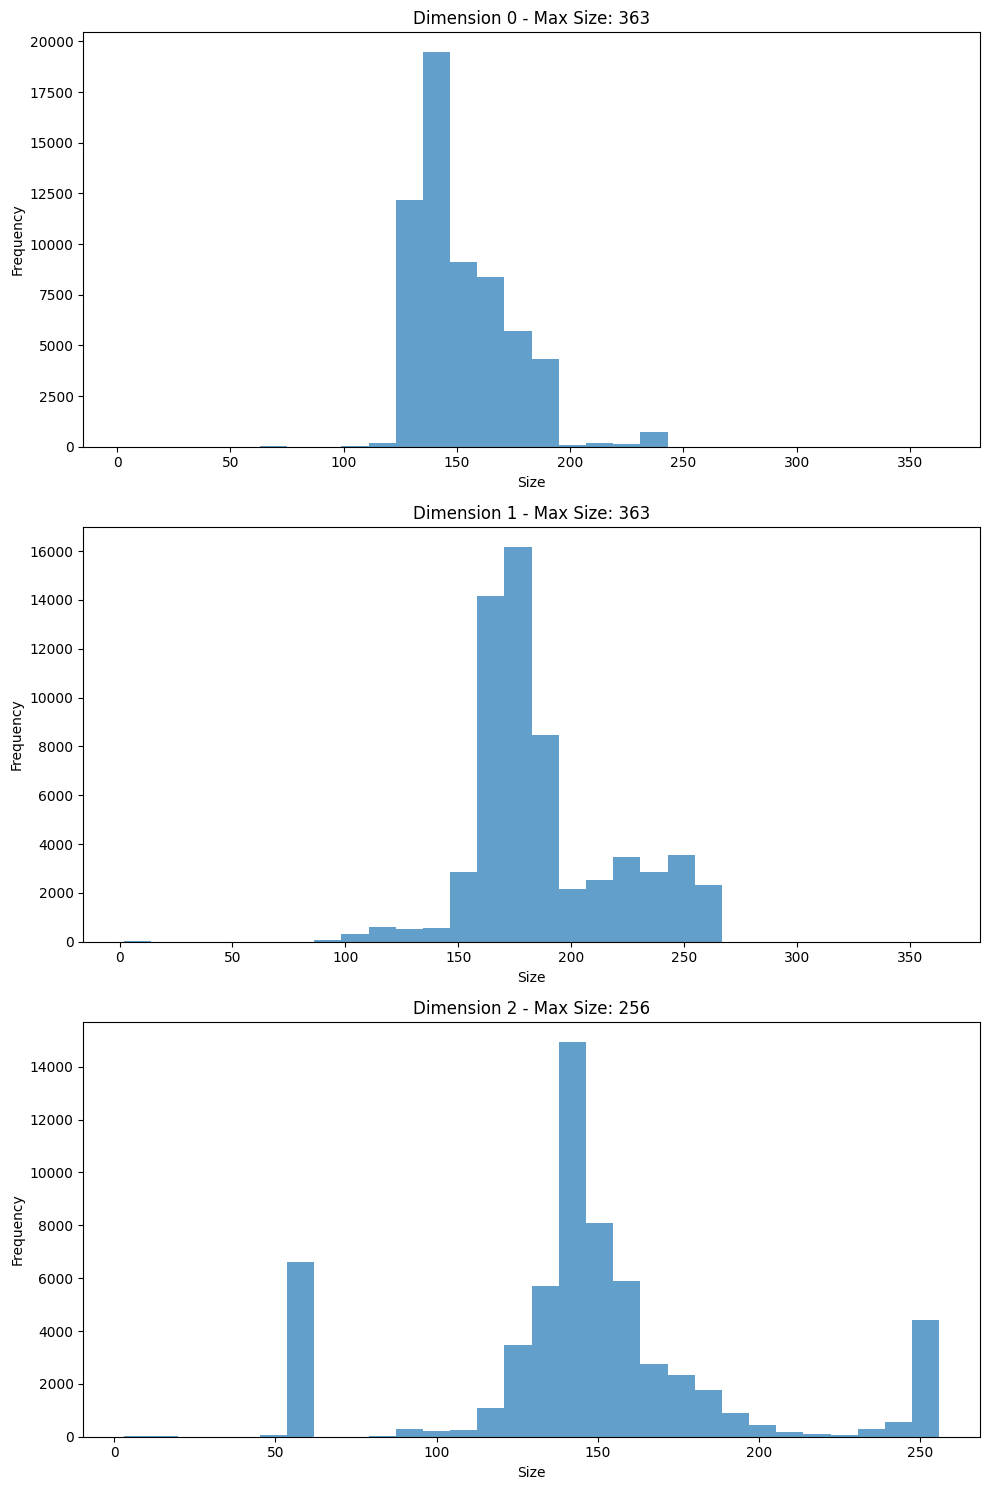

In [12]:
# Give me histogrms of sizes in each dimension of all samples in `samples_dir` with possibility to exclude some cases
from collections import defaultdict

# Function to add exclusions based on patterns
def add_exclusions(exclusion_list, patterns):
    for pattern in patterns:
        exclusion_list.append(pattern)
    return exclusion_list

# Function to analyze sample dimensions
def analyze_sample_dimensions(exclusion_list=None):
    if exclusion_list is None:
        exclusion_list = []

    sample_data = defaultdict(list)
    max_samples = defaultdict(int)

    for file in os.listdir(samples_dir):
        if file.endswith('.pkl') and file not in exclusion_list:
            with open(os.path.join(samples_dir, file), 'rb') as f:
                data = pickle.load(f)
                new_size = data.get('new_size', None)
                if new_size:
                    for dim, size in enumerate(new_size):
                        sample_data[dim].append(size)
                        max_samples[dim] = max(max_samples[dim], size)

    return sample_data, max_samples

# draw histograms for each dimension
import matplotlib.pyplot as plt
def draw_histograms(sample_data, max_samples):
    num_dimensions = len(sample_data)
    fig, axes = plt.subplots(num_dimensions, 1, figsize=(10, 5 * num_dimensions))

    for dim in range(num_dimensions):
        axes[dim].hist(sample_data[dim], bins=30, alpha=0.7)
        axes[dim].set_title(f'Dimension {dim} - Max Size: {max_samples[dim]}')
        axes[dim].set_xlabel('Size')
        axes[dim].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# run analysis and draw histograms
custom_exclusions = [
    # "sub_9147_ses_2_dwi.pkl",
    # "sub_8084_ses_1_t1.pkl"
]
sample_data, max_samples = analyze_sample_dimensions(exclusion_list=custom_exclusions)
draw_histograms(sample_data, max_samples)

In [ ]:
# Write a function that will only X(variable) samples with highest values in whichever dimension from `samples_dir`.
def get_top_samples_by_dimension(samples_dir, top_n=5, dimension=0, exclusion_list=None):
    if exclusion_list is None:
        exclusion_list = []

    sample_sizes = []
    for file in os.listdir(samples_dir):
        if file.endswith('.pkl') and file not in exclusion_list:
            with open(os.path.join(samples_dir, file), 'rb') as f:
                data = pickle.load(f)
                new_size = data.get('new_size', None)
                if new_size and len(new_size) > dimension:
                    sample_sizes.append((file, new_size[dimension]))

    # Sort samples by the specified dimension size
    sorted_samples = sorted(sample_sizes, key=lambda x: x[1], reverse=True)

    # Get top N samples
    top_samples = sorted_samples[:top_n]

    return top_samples


top_n = 100
custom_exclusions = [
    "sub_9147_ses_2_dwi.pkl",   # 0: 363
    "sub_10162_ses_2_dwi.pkl",  # 0: 256
    "sub_10162_ses_2_dwi_2.pkl",# 0: 256
    "sub_8084_ses_1_t1.pkl",    # 1: 269
    "sub_9508_ses_1_t1.pkl",    # 1: 263
    "sub_1953_ses_1_t1.pkl",    # 1: 263
    "sub_2019_ses_1_flair.pkl", # 1: 263
    "sub_2019_ses_1_t1.pkl",    # 1: 262
    "sub_8486_ses_1_t1.pkl",    # 1: 262
    "sub_8486_ses_1_dwi.pkl",   # 1: 261
    "sub_9349_ses_1_t1.pkl",    # 1: 261
    "sub_3213_ses_1_t1.pkl",    # 1: 261
    "sub_3614_ses_1_t1.pkl",    # 1: 260
    "sub_7642_ses_1_dwi.pkl",   # 1: 260
    "sub_7642_ses_1_t1.pkl",    # 1: 259
    "sub_4961_ses_1_t1.pkl",    # 1: 258
    "sub_3028_ses_1_dwi_2.pkl", # 1: 258
    "sub_7642_ses_1_flair.pkl", # 1: 257
    "sub_4961_ses_1_flair.pkl", # 1: 257
]

top_samples = get_top_samples_by_dimension(samples_dir, top_n=top_n, dimension=2, exclusion_list=custom_exclusions)
print("Top samples by dimension 0:")
pp.pprint(top_samples)


In [46]:

pkl_sample_name= "FOMO2_sub_1.pkl" #"sub_10000_ses_1_flair.pkl"

pkl_sample_path = os.path.join(samples_dir, pkl_sample_name)
with open(pkl_sample_path, "rb") as f:
    pkl_data = pickle.load(f)
print("Loaded .pkl file: ")
pp.pprint(pkl_data)

Loaded .pkl file: 
{'crop_to_nonzero': [0, 384, 0, 512, 0, 30],
 'foreground_locations': {'1': [[96, 169, 118],
                                [96, 171, 118],
                                [97, 166, 118],
                                [97, 168, 112],
                                [97, 168, 122],
                                [97, 169, 121],
                                [97, 170, 120],
                                [97, 171, 119],
                                [97, 172, 118],
                                [97, 174, 118],
                                [98, 163, 118],
                                [98, 164, 117],
                                [98, 165, 116],
                                [98, 166, 115],
                                [98, 167, 114],
                                [98, 167, 124],
                                [98, 168, 117],
                                [98, 168, 127],
                                [98, 169, 120],
                        

Analyzing file: /home/mg873uh/Projects_kb/data/finetuning_preproc/Task002_FOMO2/FOMO2_sub_1.npy
Original data shape: (4, 165, 220, 168)
Data type: float64
Data shape: (3, 165, 220, 168)
Label shape: (165, 220, 168)
Min value: 0.0000
Max value: 1.0000
Mean value: 0.2255
Std deviation: 0.2994
Selected volume at indices [0]: shape = (165, 220, 168)


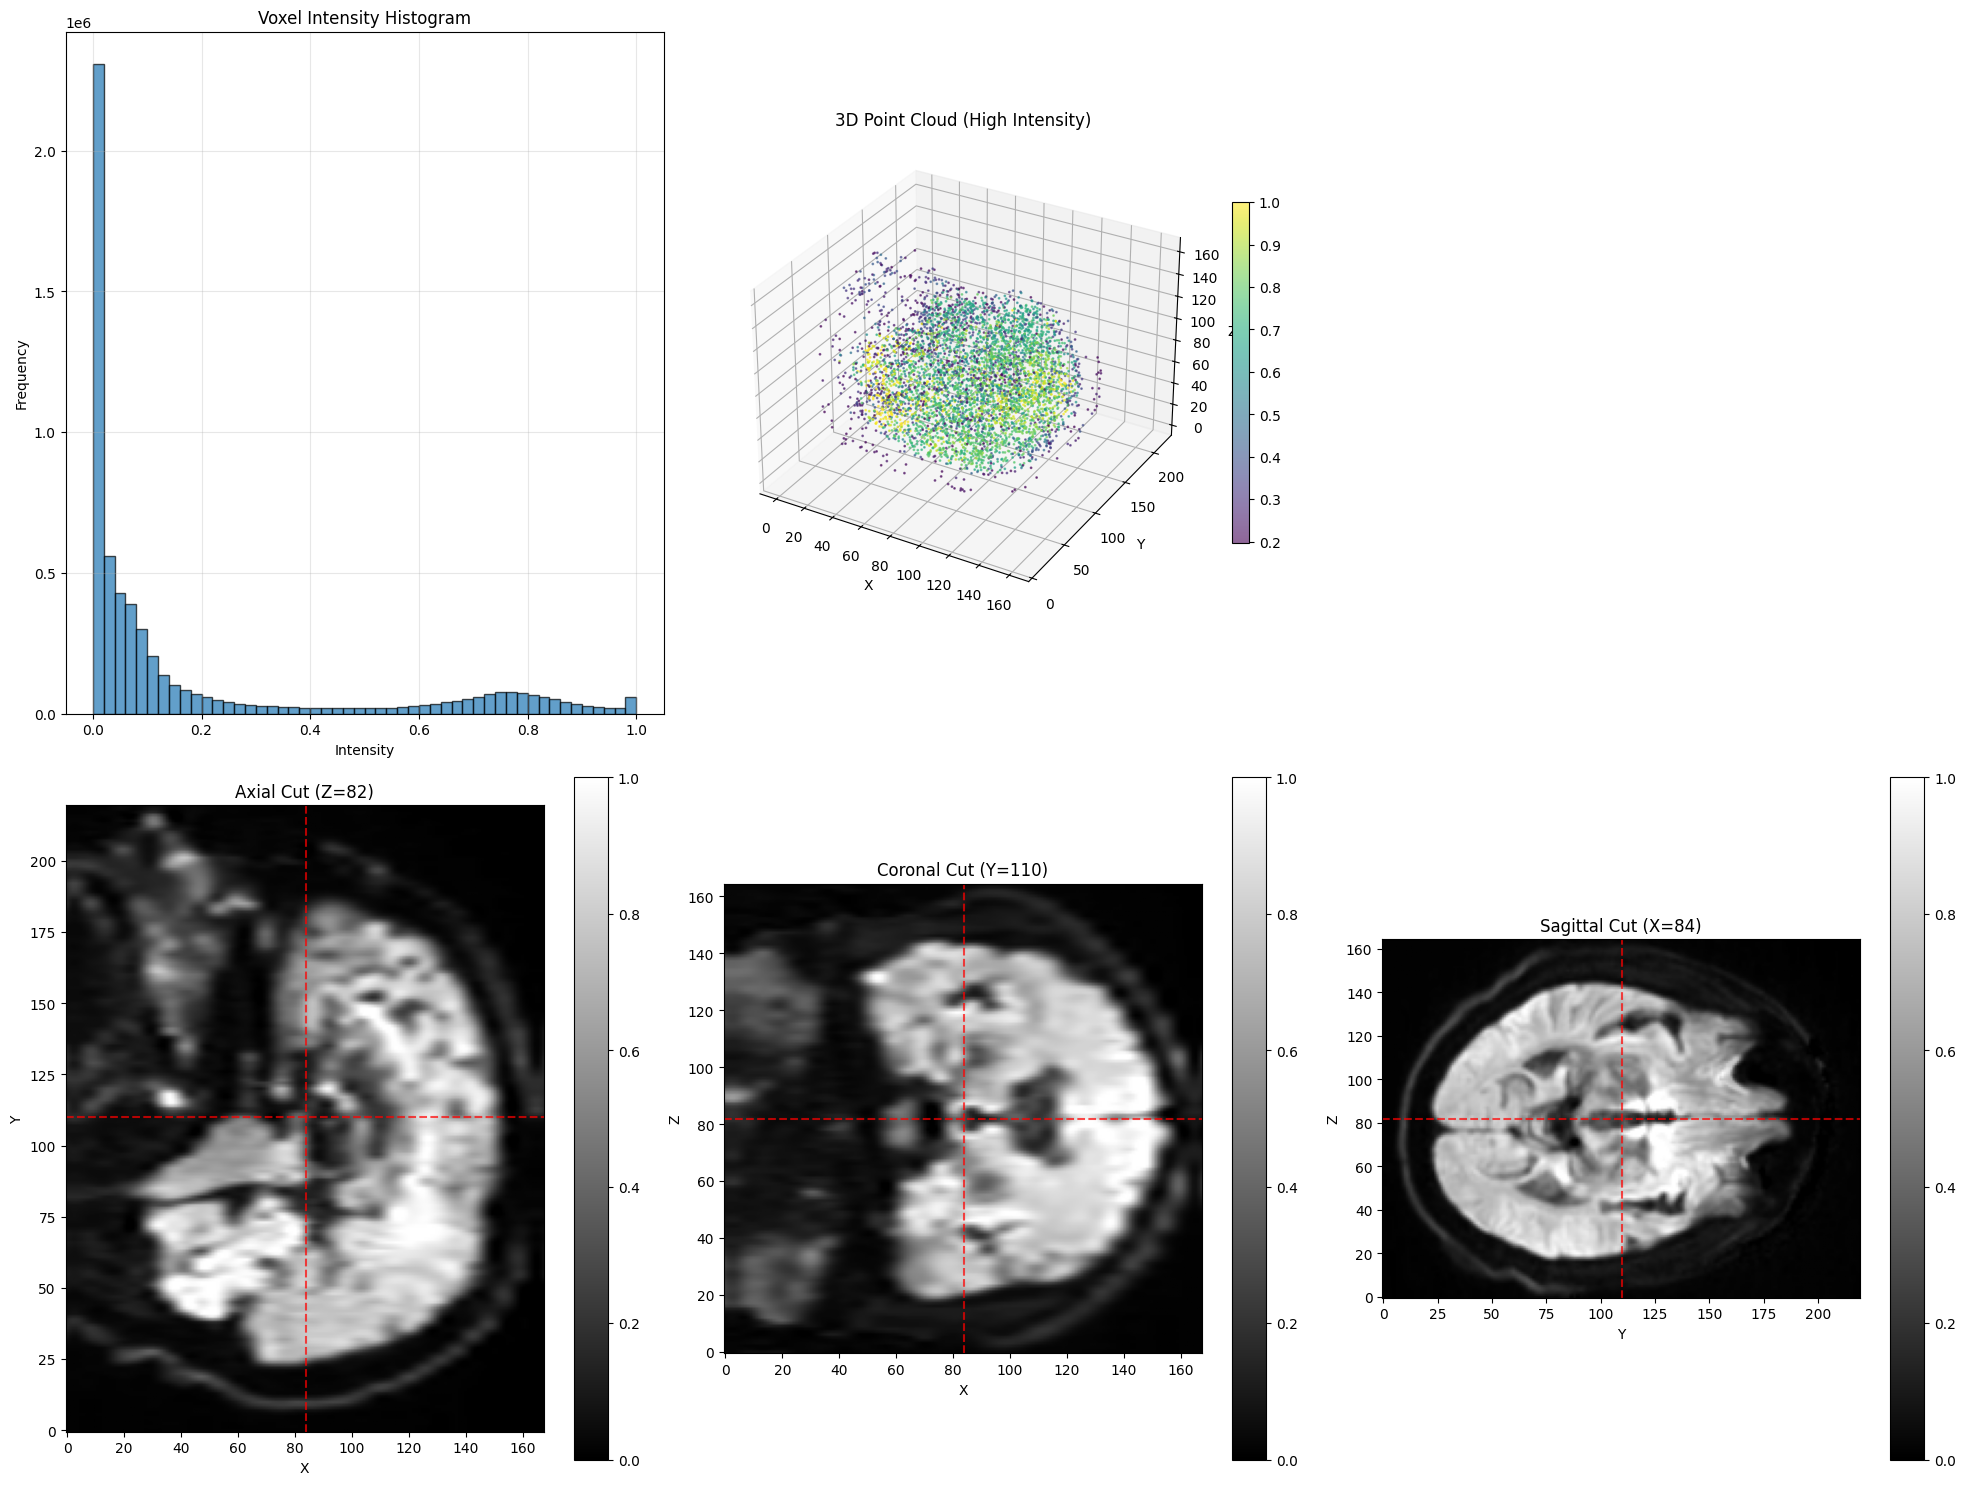


Center point for orthogonal cuts: (84, 110, 82)

Creating 3D label visualization...
Label shape: (165, 220, 168)
Label unique values: [0. 1.]
Plotted all 3774 non-zero voxels


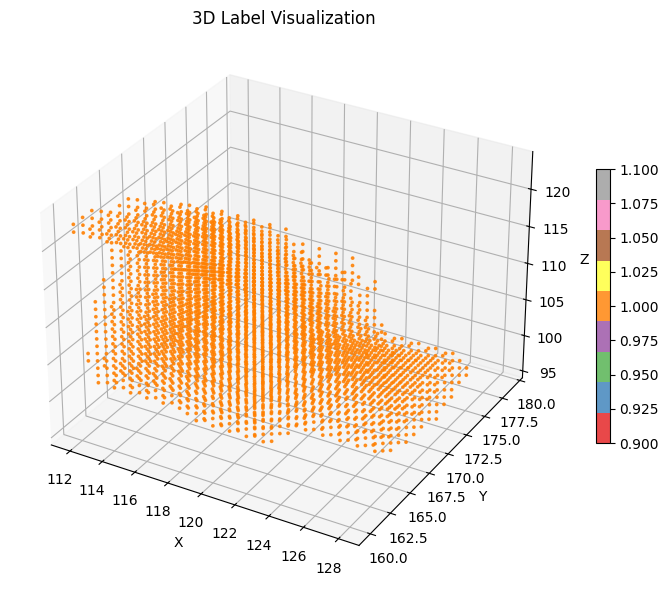

In [47]:
# Analysis of .npy files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def analyze_npy_file(npy_path, show_volume=None):
    """
    Analyze a .npy file containing image data.
    - Display image information (dimensions, intensity histogram)
    - For 3D data: show 3D point cloud and orthogonal cuts (MPRs)

    Args:
        npy_path (str): Path to the .npy file
        show_volume (list, optional): List of indices to select specific volume from multi-dimensional data.
                                    For example:
                                    - If data shape is [4, 100, 100, 100] and show_volume=[2],
                                      it will select data[2, :, :, :]
                                    - If data shape is [2, 4, 100, 100, 100] and show_volume=[1, 2],
                                      it will select data[1, 2, :, :, :]
    """
    # Load the data
    data = np.load(npy_path, allow_pickle=True)

    print(f"Analyzing file: {npy_path}")
    print(f"Original data shape: {data.shape}")

    label = None
    if data.dtype == object:
        print(f"Warning: Data type is object, which may indicate a complex structure.")
        data = data.tolist()
        label = np.array(data[-1])    # Last element is the label
        images = np.array(data[:-1])    # All elements except the last one
        data = images  # Use images for further analysis

    print(f"Data type: {data.dtype}")
    print(f"Data shape: {data.shape}")
    if label is not None:
        print(f"Label shape: {label.shape if isinstance(label, np.ndarray) else 'N/A'}")
    print(f"Min value: {data.min():.4f}")
    print(f"Max value: {data.max():.4f}")
    print(f"Mean value: {data.mean():.4f}")
    print(f"Std deviation: {data.std():.4f}")

    if len(data.shape) < 3:
        print(f"Unsupported data dimensions: {len(data.shape)}D")
        return

    if len(data.shape) > 3:
        if show_volume is not None:
            # Validate show_volume parameter
            expected_indices = len(data.shape) - 3
            if len(show_volume) != expected_indices:
                raise ValueError(f"show_volume must have {expected_indices} indices for data shape {data.shape}, got {len(show_volume)}")

            # Check if indices are valid
            for i, idx in enumerate(show_volume):
                if idx >= data.shape[i]:
                    raise ValueError(f"Index {idx} at position {i} is out of bounds for dimension size {data.shape[i]}")

            # Select the specific volume using the provided indices
            selection = tuple(show_volume) + tuple(slice(None) for _ in range(3))
            data = data[selection]
            print(f"Selected volume at indices {show_volume}: shape = {data.shape}")
        else:
            # Default behavior: take the last 3 dimensions of the first volume
            indices = tuple(0 for _ in range(len(data.shape) - 3))
            data = data[indices]
            print(f"No volume specified, using first volume at indices {indices}: shape = {data.shape}")

    # Create figure with subplots
    if len(data.shape) == 3:
        fig = plt.figure(figsize=(20, 15))

        # 1. Intensity histogram
        plt.subplot(2, 3, 1)
        plt.hist(data.flatten(), bins=50, alpha=0.7, edgecolor='black')
        plt.title('Voxel Intensity Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)

        # 2. 3D point cloud (sample points for performance)
        ax_3d = fig.add_subplot(2, 3, 2, projection='3d')

        # Sample points to avoid overwhelming the plot
        z, y, x = np.where(data > np.percentile(data, 75))  # Show only high-intensity points
        sample_indices = np.random.choice(len(x), min(5000, len(x)), replace=False)
        x_sample = x[sample_indices]
        y_sample = y[sample_indices]
        z_sample = z[sample_indices]
        colors = data[z_sample, y_sample, x_sample]

        scatter = ax_3d.scatter(x_sample, y_sample, z_sample, c=colors,
                               cmap='viridis', alpha=0.6, s=1)
        ax_3d.set_title('3D Point Cloud (High Intensity)')
        ax_3d.set_xlabel('X')
        ax_3d.set_ylabel('Y')
        ax_3d.set_zlabel('Z')
        plt.colorbar(scatter, ax=ax_3d, shrink=0.5)

        # Calculate center point for orthogonal cuts
        center_z, center_y, center_x = data.shape[0]//2, data.shape[1]//2, data.shape[2]//2

        # 3. Axial cut (XY plane)
        plt.subplot(2, 3, 4)
        plt.imshow(data[center_z, :, :], cmap='gray', origin='lower')
        plt.title(f'Axial Cut (Z={center_z})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_y, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_x, color='red', linestyle='--', alpha=0.7)

        # 4. Coronal cut (XZ plane)
        plt.subplot(2, 3, 5)
        plt.imshow(data[:, center_y, :], cmap='gray', origin='lower')
        plt.title(f'Coronal Cut (Y={center_y})')
        plt.xlabel('X')
        plt.ylabel('Z')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_z, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_x, color='red', linestyle='--', alpha=0.7)

        # 5. Sagittal cut (YZ plane)
        plt.subplot(2, 3, 6)
        plt.imshow(data[:, :, center_x], cmap='gray', origin='lower')
        plt.title(f'Sagittal Cut (X={center_x})')
        plt.xlabel('Y')
        plt.ylabel('Z')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_z, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_y, color='red', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

        print(f"\nCenter point for orthogonal cuts: ({center_x}, {center_y}, {center_z})")

    # Create separate 3D visualization for label if it exists
    if label is not None:
        print(f"\nCreating 3D label visualization...")
        print(f"Label shape: {label.shape}")
        print(f"Label unique values: {np.unique(label)}")

        fig_label = plt.figure(figsize=(8, 6))
        ax_label = fig_label.add_subplot(111, projection='3d')

        # Find non-zero voxels (assuming 0 is background)
        z, y, x = np.where(label > 0)

        if len(x) > 0:
            # Sample points if too many (for performance)
            if len(x) > 10000:
                sample_indices = np.random.choice(len(x), 10000, replace=False)
                x_sample = x[sample_indices]
                y_sample = y[sample_indices]
                z_sample = z[sample_indices]
                colors = label[z_sample, y_sample, x_sample]
                print(f"Sampled {len(x_sample)} points from {len(x)} total non-zero voxels")
            else:
                x_sample, y_sample, z_sample = x, y, z
                colors = label[z_sample, y_sample, x_sample]
                print(f"Plotted all {len(x)} non-zero voxels")

            scatter = ax_label.scatter(x_sample, y_sample, z_sample, c=colors,
                                     cmap='Set1', alpha=0.8, s=3)
            ax_label.set_title('3D Label Visualization')
            ax_label.set_xlabel('X')
            ax_label.set_ylabel('Y')
            ax_label.set_zlabel('Z')
            plt.colorbar(scatter, ax=ax_label, shrink=0.5)
        else:
            ax_label.text(0.5, 0.5, 0.5, 'No non-zero label voxels found',
                         transform=ax_label.transAxes, ha='center', va='center')
            ax_label.set_title('3D Label Visualization (Empty)')

        plt.tight_layout()
        plt.show()

npy_sample_name = "FOMO2_sub_1.npy"

npy_sample_path = os.path.join(samples_dir, npy_sample_name)
analyze_npy_file(npy_sample_path, show_volume=[0])

# Example usage with volume selection:
# For data shaped [4, 100, 100, 100], to show volume at index 2:
# analyze_npy_file(npy_sample_path, show_volume=[2])

# For data shaped [2, 4, 100, 100, 100], to show volume at indices [1, 2]:
# analyze_npy_file(npy_sample_path, show_volume=[1, 2])

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from collections import defaultdict

def get_session_files():
    """
    Group files by session (prefix pattern like sub_7373_ses_1).
    Returns a dictionary with session as key and list of files as value.
    """
    import re
    npy_files = [f for f in os.listdir(samples_dir) if f.endswith('.npy')]

    sessions = defaultdict(list)
    for file in npy_files:
        # Extract session using regex pattern: sub_{integer}_ses_{integer}
        # Pattern: sub_XXXX_ses_X_modality.npy -> sub_XXXX_ses_X
        match = re.match(r'(sub_\d+_ses_\d+)_', file)
        if match:
            session = match.group(1)
            sessions[session].append(file)
        else:
            # Handle files that don't match the expected pattern
            print(f"Warning: File '{file}' doesn't match expected pattern sub_{{int}}_ses_{{int}}_*")

    return dict(sessions)

sessions = get_session_files()

def pad_to_same_shape(img1, img2):
    """
    Pad both images to the same shape by padding with zeros.
    Returns padded versions of both images.
    """
    # Get maximum dimensions
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(img1.shape, img2.shape))

    def pad_image(img, target_shape):
        pad_widths = []
        for i in range(len(target_shape)):
            diff = target_shape[i] - img.shape[i]
            pad_before = diff // 2
            pad_after = diff - pad_before
            pad_widths.append((pad_before, pad_after))
        return np.pad(img, pad_widths, mode='constant', constant_values=0)

    img1_padded = pad_image(img1, max_shape)
    img2_padded = pad_image(img2, max_shape)

    return img1_padded, img2_padded, max_shape

def compare_session_coregistration(session_name, file1_name, file2_name):
    """
    Compare two co-registered images from the same session showing sagittal, coronal, and axial cuts.
    Always takes cuts at the center of the images without any alignment intervention.
    """
    file1_path = os.path.join(samples_dir, file1_name)
    file2_path = os.path.join(samples_dir, file2_name)

    # Load the images
    img1 = np.load(file1_path)
    img2 = np.load(file2_path)

    print(f"Session: {session_name}")
    print(f"Image 1: {file1_name}")
    print(f"  Original shape: {img1.shape}")
    print(f"  Data type: {img1.dtype}")
    print(f"  Value range: [{img1.min():.4f}, {img1.max():.4f}]")

    print(f"\nImage 2: {file2_name}")
    print(f"  Original shape: {img2.shape}")
    print(f"  Data type: {img2.dtype}")
    print(f"  Value range: [{img2.min():.4f}, {img2.max():.4f}]")

    # Pad images to same shape if needed
    if img1.shape != img2.shape:
        print(f"\nShapes differ - padding to common shape...")
        img1_padded, img2_padded, final_shape = pad_to_same_shape(img1, img2)
        print(f"Final padded shape: {final_shape}")
        img1, img2 = img1_padded, img2_padded
    else:
        print(f"\nShapes match: {img1.shape}")

    # Calculate center points (always at the center of the image)
    center_z, center_y, center_x = img1.shape[0]//2, img1.shape[1]//2, img1.shape[2]//2
    print(f"Center point for cuts: ({center_x}, {center_y}, {center_z})")

    # Create the comparison plot
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Co-registration Comparison - Session: {session_name}', fontsize=16)

    # Axial cuts (XY plane)
    im1 = axes[0, 0].imshow(img1[center_z, :, :], cmap='gray', origin='lower')
    axes[0, 0].set_title(f'{file1_name} - Axial (Z={center_z})')
    axes[0, 0].set_xlabel('X')
    axes[0, 0].set_ylabel('Y')
    plt.colorbar(im1, ax=axes[0, 0])

    im2 = axes[1, 0].imshow(img2[center_z, :, :], cmap='gray', origin='lower')
    axes[1, 0].set_title(f'{file2_name} - Axial (Z={center_z})')
    axes[1, 0].set_xlabel('X')
    axes[1, 0].set_ylabel('Y')
    plt.colorbar(im2, ax=axes[1, 0])

    # Coronal cuts (XZ plane)
    im3 = axes[0, 1].imshow(img1[:, center_y, :], cmap='gray', origin='lower')
    axes[0, 1].set_title(f'{file1_name} - Coronal (Y={center_y})')
    axes[0, 1].set_xlabel('X')
    axes[0, 1].set_ylabel('Z')
    plt.colorbar(im3, ax=axes[0, 1])

    im4 = axes[1, 1].imshow(img2[:, center_y, :], cmap='gray', origin='lower')
    axes[1, 1].set_title(f'{file2_name} - Coronal (Y={center_y})')
    axes[1, 1].set_xlabel('X')
    axes[1, 1].set_ylabel('Z')
    plt.colorbar(im4, ax=axes[1, 1])

    # Sagittal cuts (YZ plane)
    im5 = axes[0, 2].imshow(img1[:, :, center_x], cmap='gray', origin='lower')
    axes[0, 2].set_title(f'{file1_name} - Sagittal (X={center_x})')
    axes[0, 2].set_xlabel('Y')
    axes[0, 2].set_ylabel('Z')
    plt.colorbar(im5, ax=axes[0, 2])

    im6 = axes[1, 2].imshow(img2[:, :, center_x], cmap='gray', origin='lower')
    axes[1, 2].set_title(f'{file2_name} - Sagittal (X={center_x})')
    axes[1, 2].set_xlabel('Y')
    axes[1, 2].set_ylabel('Z')
    plt.colorbar(im6, ax=axes[1, 2])

    # Add crosshairs to all plots to show the center cuts
    for i in range(2):
        # Axial
        axes[i, 0].axhline(y=center_y, color='red', linestyle='--', alpha=0.7, linewidth=1)
        axes[i, 0].axvline(x=center_x, color='red', linestyle='--', alpha=0.7, linewidth=1)

        # Coronal
        axes[i, 1].axhline(y=center_z, color='red', linestyle='--', alpha=0.7, linewidth=1)
        axes[i, 1].axvline(x=center_x, color='red', linestyle='--', alpha=0.7, linewidth=1)

        # Sagittal
        axes[i, 2].axhline(y=center_z, color='red', linestyle='--', alpha=0.7, linewidth=1)
        axes[i, 2].axvline(x=center_y, color='red', linestyle='--', alpha=0.7, linewidth=1)

    plt.tight_layout()
    plt.show()

    return img1, img2

In [9]:
def create_interactive_comparison():
    """
    Create interactive widgets for selecting session and comparing two files within that session.
    """
    # Session input
    session_dropdown = widgets.Text(
        value=list(sessions.keys())[0] if sessions else '',
        description='Session:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )

    # File dropdowns (will be updated based on session selection)
    file1_dropdown = widgets.Dropdown(
        options=[],
        description='Image 1:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )

    file2_dropdown = widgets.Dropdown(
        options=[],
        description='Image 2:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )

    # Compare button
    compare_button = widgets.Button(
        description='Compare Co-registration',
        button_style='primary',
        layout=widgets.Layout(width='200px')
    )

    # Output area
    output = widgets.Output()

    def update_file_options(change):
        """Update file dropdown options when session changes."""
        selected_session = change['new']
        if selected_session in sessions:
            files = sessions[selected_session]
            file1_dropdown.options = files
            file2_dropdown.options = files
            # Set default selections if available
            if len(files) >= 2:
                file1_dropdown.value = files[0]
                file2_dropdown.value = files[1]
            elif len(files) == 1:
                file1_dropdown.value = files[0]
                file2_dropdown.value = files[0]
        else:
            # Clear options if session doesn't exist
            file1_dropdown.options = []
            file2_dropdown.options = []

    def on_compare_click(b):
        """Handle compare button click."""
        with output:
            clear_output()
            if session_dropdown.value not in sessions:
                print(f"Error: Session '{session_dropdown.value}' not found.")
                print(f"Available sessions: {list(sessions.keys())[:10]}...")  # Show first 10
                return

            if file1_dropdown.value and file2_dropdown.value:
                if file1_dropdown.value == file2_dropdown.value:
                    print("Warning: Same file selected for both images. Comparison will show identical images.")
                try:
                    compare_session_coregistration(
                        session_dropdown.value,
                        file1_dropdown.value,
                        file2_dropdown.value
                    )
                except Exception as e:
                    print(f"Error during comparison: {str(e)}")
            else:
                print("Please select both images to compare.")

    # Set up event handlers
    session_dropdown.observe(update_file_options, names='value')
    compare_button.on_click(on_compare_click)

    # Initialize file options for the first session
    if sessions:
        update_file_options({'new': session_dropdown.value})

    # Display the interface
    print("Interactive Co-registration Comparison Tool")
    print("=" * 50)
    print("Select a session and two images to compare their co-registration:")
    print()

    display(widgets.VBox([
        session_dropdown,
        widgets.HBox([file1_dropdown, file2_dropdown]),
        compare_button,
        output
    ]))

# Run the interactive comparison tool
create_interactive_comparison()

Interactive Co-registration Comparison Tool
Select a session and two images to compare their co-registration:

